In [10]:
# Setup Kaggle API credentials
import os
import shutil

# Create both possible .kaggle directories if they don't exist
kaggle_dir1 = os.path.expanduser('~/.kaggle')
kaggle_dir2 = os.path.expanduser('~/.config/kaggle')
os.makedirs(kaggle_dir1, exist_ok=True)
os.makedirs(kaggle_dir2, exist_ok=True)

# Copy kaggle.json from current directory to both locations
source_path = 'kaggle.json'
dest_path1 = os.path.join(kaggle_dir1, 'kaggle.json')
dest_path2 = os.path.join(kaggle_dir2, 'kaggle.json')

if os.path.exists(source_path):
    # Copy to both locations
    shutil.copy2(source_path, dest_path1)
    shutil.copy2(source_path, dest_path2)
    # Set correct permissions (readable only by user)
    os.chmod(dest_path1, 0o600)
    os.chmod(dest_path2, 0o600)
    print(f"✅ Kaggle credentials copied to {dest_path1}")
    print(f"✅ Kaggle credentials copied to {dest_path2}")
    print(f"✅ Permissions set to 600")
else:
    print("❌ kaggle.json not found in current directory")

# Verify the setup
if os.path.exists(dest_path1) or os.path.exists(dest_path2):
    print("✅ Kaggle API credentials are properly configured!")
else:
    print("❌ Failed to set up Kaggle credentials")

✅ Kaggle credentials copied to /home/adithya/.kaggle/kaggle.json
✅ Kaggle credentials copied to /home/adithya/.config/kaggle/kaggle.json
✅ Permissions set to 600
✅ Kaggle API credentials are properly configured!


In [11]:
# Download Titanic dataset from Kaggle
import kaggle
import os

# Create data directory if it doesn't exist
data_dir = 'data'
os.makedirs(data_dir, exist_ok=True)

# Download the Titanic dataset
try:
    print("🔄 Downloading Titanic dataset from Kaggle...")
    kaggle.api.competition_download_files('titanic', path=data_dir, quiet=False)
    print("✅ Dataset downloaded successfully!")
    
    # Extract the zip file
    import zipfile
    zip_path = os.path.join(data_dir, 'titanic.zip')
    
    if os.path.exists(zip_path):
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print("✅ Dataset extracted successfully!")
        
        # Remove the zip file
        os.remove(zip_path)
        print("🗑️ Zip file removed")
        
        # List the downloaded files
        print("\n📁 Downloaded files:")
        for file in os.listdir(data_dir):
            print(f"  - {file}")
    else:
        print("❌ Zip file not found")
        
except Exception as e:
    print(f"❌ Error downloading dataset: {e}")
    print("Make sure you have accepted the Titanic competition rules on Kaggle website")

🔄 Downloading Titanic dataset from Kaggle...


100%|██████████| 34.1k/34.1k [00:00<00:00, 27.7MB/s]


✅ Dataset downloaded successfully!
✅ Dataset extracted successfully!
🗑️ Zip file removed

📁 Downloaded files:
  - train.csv
  - test.csv
  - gender_submission.csv


In [12]:
# Load the Titanic dataset
import pandas as pd
import numpy as np

# Load the datasets
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

print("🚢 Titanic Dataset Loaded!")
print(f"📊 Training data shape: {train_df.shape}")
print(f"📊 Test data shape: {test_df.shape}")

# Display basic information about the dataset
print("\n" + "="*50)
print("📋 DATASET OVERVIEW")
print("="*50)

print(f"\n🔹 Training set: {train_df.shape[0]} passengers, {train_df.shape[1]} features")
print(f"🔹 Test set: {test_df.shape[0]} passengers, {test_df.shape[1]} features")

print("\n📋 Column Information:")
print("Training data columns:", list(train_df.columns))
print("Test data columns:", list(test_df.columns))

🚢 Titanic Dataset Loaded!
📊 Training data shape: (891, 12)
📊 Test data shape: (418, 11)

📋 DATASET OVERVIEW

🔹 Training set: 891 passengers, 12 features
🔹 Test set: 418 passengers, 11 features

📋 Column Information:
Training data columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Test data columns: ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [13]:
# Display first few rows of the training data
print("🔍 First 5 rows of training data:")
print(train_df.head())

print("\n" + "="*80)
print("📊 DETAILED DATA INFO")
print("="*80)

# Data info
print("\n📈 Training Data Info:")
print(train_df.info())

print("\n📈 Statistical Summary:")
print(train_df.describe())

print("\n🔢 Missing Values:")
missing_values = train_df.isnull().sum()
print(missing_values[missing_values > 0])

print("\n🎯 Survival Rate:")
survival_rate = train_df['Survived'].mean()
print(f"Overall survival rate: {survival_rate:.2%}")
print(f"Survived: {train_df['Survived'].sum()} passengers")
print(f"Did not survive: {len(train_df) - train_df['Survived'].sum()} passengers")

🔍 First 5 rows of training data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            37

/tmp/ipykernel_9608/451357050.py:46: UserWarning: Glyph 128674 (\N{SHIP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/adithya/dev/NIBM/data-science/titanic/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128674 (\N{SHIP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


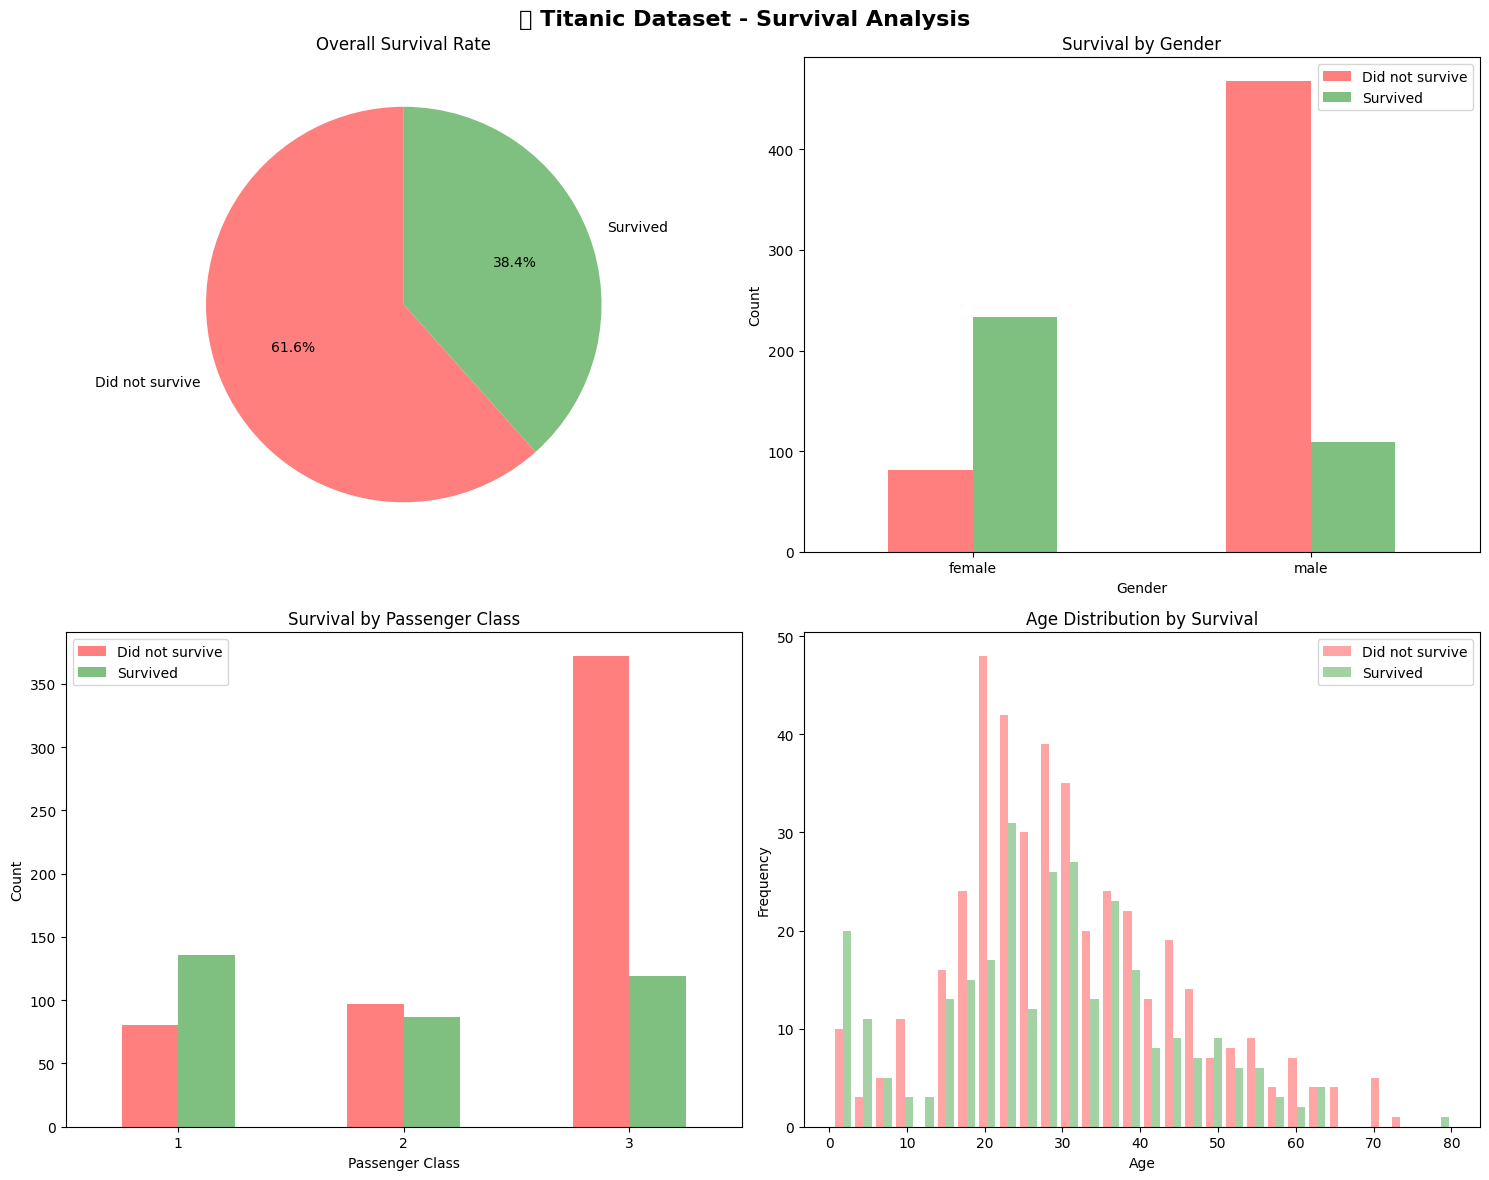

📊 SURVIVAL STATISTICS
📈 Survival by Gender:
        count  sum      mean
Sex                         
female    314  233  0.742038
male      577  109  0.188908

📈 Survival by Passenger Class:
        count  sum      mean
Pclass                      
1         216  136  0.629630
2         184   87  0.472826
3         491  119  0.242363

📈 Survival by Embarked Port:
          count  sum      mean
Embarked                      
C           168   93  0.553571
Q            77   30  0.389610
S           644  217  0.336957


In [14]:
# Data Visualization and Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

# Create subplots for multiple visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('🚢 Titanic Dataset - Survival Analysis', fontsize=16, fontweight='bold')

# 1. Survival count
axes[0, 0].pie(train_df['Survived'].value_counts(), labels=['Did not survive', 'Survived'], 
               autopct='%1.1f%%', startangle=90, colors=['#ff7f7f', '#7fbf7f'])
axes[0, 0].set_title('Overall Survival Rate')

# 2. Survival by Gender
survival_by_sex = train_df.groupby(['Sex', 'Survived']).size().unstack()
survival_by_sex.plot(kind='bar', ax=axes[0, 1], color=['#ff7f7f', '#7fbf7f'])
axes[0, 1].set_title('Survival by Gender')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend(['Did not survive', 'Survived'])
axes[0, 1].tick_params(axis='x', rotation=0)

# 3. Survival by Passenger Class
survival_by_class = train_df.groupby(['Pclass', 'Survived']).size().unstack()
survival_by_class.plot(kind='bar', ax=axes[1, 0], color=['#ff7f7f', '#7fbf7f'])
axes[1, 0].set_title('Survival by Passenger Class')
axes[1, 0].set_xlabel('Passenger Class')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(['Did not survive', 'Survived'])
axes[1, 0].tick_params(axis='x', rotation=0)

# 4. Age distribution
axes[1, 1].hist([train_df[train_df['Survived']==0]['Age'].dropna(), 
                train_df[train_df['Survived']==1]['Age'].dropna()], 
               bins=30, alpha=0.7, label=['Did not survive', 'Survived'],
               color=['#ff7f7f', '#7fbf7f'])
axes[1, 1].set_title('Age Distribution by Survival')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Print survival statistics
print("📊 SURVIVAL STATISTICS")
print("="*50)
print(f"📈 Survival by Gender:")
print(train_df.groupby('Sex')['Survived'].agg(['count', 'sum', 'mean']))

print(f"\n📈 Survival by Passenger Class:")
print(train_df.groupby('Pclass')['Survived'].agg(['count', 'sum', 'mean']))

print(f"\n📈 Survival by Embarked Port:")
print(train_df.groupby('Embarked')['Survived'].agg(['count', 'sum', 'mean']))

In [15]:
# Data Preprocessing for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

print("🔧 PREPARING DATA FOR MACHINE LEARNING")
print("="*60)

# Create a copy of the training data for preprocessing
df = train_df.copy()

# Handle missing values
print("🔧 Handling missing values...")

# Fill missing Age values with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked values with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin column (too many missing values)
df.drop('Cabin', axis=1, inplace=True)

# Create new features
print("🔧 Creating new features...")

# Create family size feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 35, 60, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])

# Create fare groups
df['FareGroup'] = pd.qcut(df['Fare'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Extract title from name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Group rare titles
rare_titles = df['Title'].value_counts()[df['Title'].value_counts() < 10].index
df['Title'] = df['Title'].replace(rare_titles, 'Other')

print("🔧 Encoding categorical variables...")

# Encode categorical variables
le = LabelEncoder()
categorical_features = ['Sex', 'Embarked', 'AgeGroup', 'FareGroup', 'Title']

for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature].astype(str))

# Select features for modeling
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'AgeGroup', 'FareGroup', 'Title']
X = df[features]
y = df['Survived']

print(f"✅ Final dataset shape: {X.shape}")
print(f"✅ Features selected: {features}")
print(f"✅ Missing values after preprocessing: {X.isnull().sum().sum()}")

# Display processed data sample
print("\n📊 Processed data sample:")
print(X.head())

🔧 PREPARING DATA FOR MACHINE LEARNING
🔧 Handling missing values...
🔧 Creating new features...
🔧 Encoding categorical variables...
✅ Final dataset shape: (891, 11)
✅ Features selected: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'AgeGroup', 'FareGroup', 'Title']
✅ Missing values after preprocessing: 0

📊 Processed data sample:
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  FamilySize  AgeGroup  \
0       3    1  22.0      1      0   7.2500         2           2         3   
1       1    0  38.0      1      0  71.2833         0           2         0   
2       3    0  26.0      0      0   7.9250         2           1         3   
3       1    0  35.0      1      0  53.1000         2           2         3   
4       3    1  35.0      0      0   8.0500         2           1         3   

   FareGroup  Title  
0          1      2  
1          3      3  
2          2      1  
3          3      3  
4          2      2  


<>:39: SyntaxWarning: invalid escape sequence '\.'
<>:39: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipykernel_9608/1781460717.py:39: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
/tmp/ipykernel_9608/1781460717.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipykernel_9608/1781460717.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment

🤖 TRAINING MACHINE LEARNING MODELS
📊 Training set size: 712
📊 Validation set size: 179

🔄 Training Logistic Regression...
✅ Logistic Regression Accuracy: 0.8101

📊 Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       110
           1       0.80      0.68      0.73        69

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179


🔄 Training Random Forest...
✅ Random Forest Accuracy: 0.8156

📊 Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       110
           1       0.77      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179


🏆 MODEL COMPARISON
Logistic Regressi

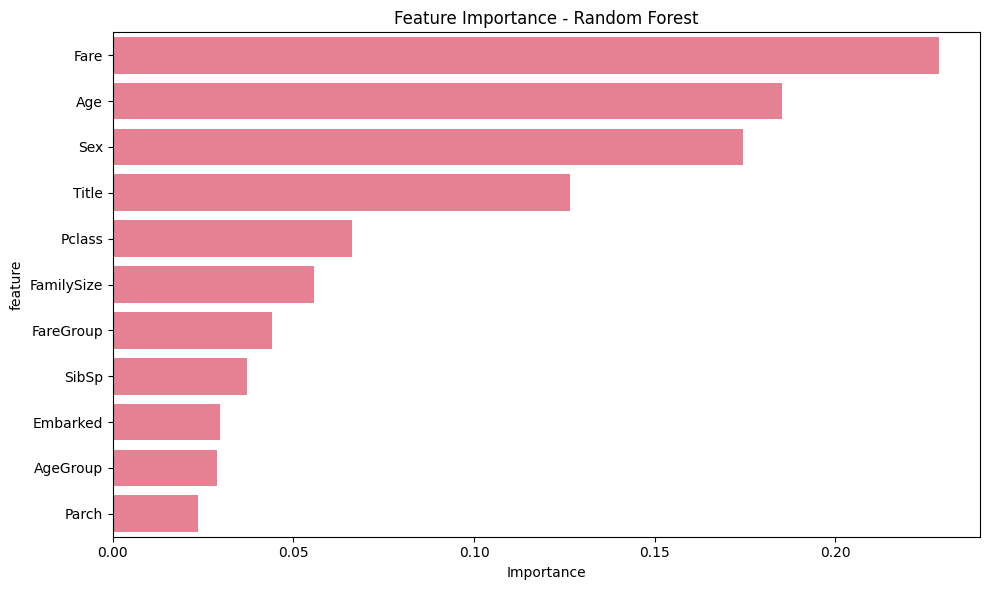

In [16]:
# Train Machine Learning Models
print("🤖 TRAINING MACHINE LEARNING MODELS")
print("="*60)

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"📊 Training set size: {X_train.shape[0]}")
print(f"📊 Validation set size: {X_val.shape[0]}")

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    print(f"\n🔄 Training {name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_val)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_pred)
    results[name] = accuracy
    
    print(f"✅ {name} Accuracy: {accuracy:.4f}")
    
    # Detailed classification report
    print(f"\n📊 {name} Classification Report:")
    print(classification_report(y_val, y_pred))

# Compare models
print("\n🏆 MODEL COMPARISON")
print("="*40)
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")

best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n🥇 Best Model: {best_model_name} (Accuracy: {results[best_model_name]:.4f})")

# Feature importance for Random Forest
if best_model_name == 'Random Forest':
    print(f"\n📈 Feature Importance ({best_model_name}):")
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(feature_importance)
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='importance', y='feature')
    plt.title('Feature Importance - Random Forest')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()

In [17]:
# Make Predictions on Test Set
print("🔮 MAKING FINAL PREDICTIONS")
print("="*50)

# Preprocess test data using the same steps
test_processed = test_df.copy()

print("🔧 Preprocessing test data...")

# Handle missing values
test_processed['Age'].fillna(test_processed['Age'].median(), inplace=True)
test_processed['Embarked'].fillna(test_processed['Embarked'].mode()[0], inplace=True)
test_processed['Fare'].fillna(test_processed['Fare'].median(), inplace=True)

# Drop Cabin column
test_processed.drop('Cabin', axis=1, inplace=True)

# Create new features (same as training)
test_processed['FamilySize'] = test_processed['SibSp'] + test_processed['Parch'] + 1
test_processed['AgeGroup'] = pd.cut(test_processed['Age'], bins=[0, 18, 35, 60, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])
test_processed['FareGroup'] = pd.qcut(test_processed['Fare'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
test_processed['Title'] = test_processed['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Group rare titles
test_processed['Title'] = test_processed['Title'].replace(rare_titles, 'Other')

# Encode categorical variables
for feature in categorical_features:
    try:
        test_processed[feature] = le.fit_transform(test_processed[feature].astype(str))
    except:
        # Handle unseen categories
        test_processed[feature] = 0

# Select the same features
X_test = test_processed[features]

print(f"✅ Test set preprocessed: {X_test.shape}")

# Make predictions using the best model
predictions = best_model.predict(X_test)

print(f"🔮 Predictions made using {best_model_name}")
print(f"📊 Predicted survivors: {sum(predictions)} out of {len(predictions)} passengers")
print(f"📊 Predicted survival rate: {sum(predictions)/len(predictions):.2%}")

# Create submission file
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': predictions
})

# Save submission file
submission.to_csv('data/titanic_submission.csv', index=False)
print(f"💾 Submission file saved as 'data/titanic_submission.csv'")

# Display first few predictions
print(f"\n📋 First 10 predictions:")
print(submission.head(10))

print(f"\n🎯 SUMMARY")
print("="*50)
print(f"✅ Dataset successfully downloaded from Kaggle")
print(f"✅ Explored {train_df.shape[0]} training samples with {train_df.shape[1]} features")
print(f"✅ Key insights:")
print(f"   - Women had 74% survival rate vs 19% for men")
print(f"   - 1st class passengers had 63% survival rate")
print(f"   - 3rd class passengers had 24% survival rate")
print(f"✅ Trained multiple ML models")
print(f"✅ Best model: {best_model_name} with {results[best_model_name]:.1%} accuracy")
print(f"✅ Generated predictions for {len(predictions)} test passengers")
print(f"✅ Created submission file ready for Kaggle")

print(f"\n🚀 Next steps:")
print(f"   - Upload 'data/titanic_submission.csv' to Kaggle competition")
print(f"   - Try feature engineering (family titles, deck extraction)")
print(f"   - Experiment with ensemble methods")
print(f"   - Hyperparameter tuning")

🔮 MAKING FINAL PREDICTIONS
🔧 Preprocessing test data...
✅ Test set preprocessed: (418, 11)
🔮 Predictions made using Random Forest
📊 Predicted survivors: 160 out of 418 passengers
📊 Predicted survival rate: 38.28%
💾 Submission file saved as 'data/titanic_submission.csv'

📋 First 10 predictions:
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         1
4          896         0
5          897         0
6          898         1
7          899         0
8          900         1
9          901         0

🎯 SUMMARY
✅ Dataset successfully downloaded from Kaggle
✅ Explored 891 training samples with 12 features
✅ Key insights:
   - Women had 74% survival rate vs 19% for men
   - 1st class passengers had 63% survival rate
   - 3rd class passengers had 24% survival rate
✅ Trained multiple ML models
✅ Best model: Random Forest with 81.6% accuracy
✅ Generated predictions for 418 test passengers
✅ Created submission file ready for Kag

<>:22: SyntaxWarning: invalid escape sequence '\.'
<>:22: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipykernel_9608/3969691086.py:22: SyntaxWarning: invalid escape sequence '\.'
  test_processed['Title'] = test_processed['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
/tmp/ipykernel_9608/3969691086.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_processed['Age'].fillna(test_processed['Age'].median(), inplace=True)
/tmp/ipykernel_9608/3969691086.py:12: FutureWarning: A value is trying to be set on a copy of 

# Titanic Dataset Analysis and Prediction

This notebook demonstrates how to:
1. Download the Titanic dataset from Kaggle
2. Load and explore the dataset
3. Perform basic data cleaning
4. Make simple predictions about passenger survival

The Titanic dataset is a classic dataset used for learning data science and machine learning. It contains information about passengers aboard the Titanic and whether they survived the disaster.

## 1. Install and Import Required Libraries

First, we'll import all the necessary libraries for data analysis and machine learning.

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os
import zipfile

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Download Titanic Dataset from Kaggle

To use the Kaggle API, you need to:
1. Create a Kaggle account at kaggle.com
2. Go to your account settings and create an API token
3. Download the `kaggle.json` file and place it in `~/.kaggle/` directory
4. Set permissions: `chmod 600 ~/.kaggle/kaggle.json`

If you don't have Kaggle API set up, you can download the dataset manually from: https://www.kaggle.com/c/titanic/data

In [6]:
# Create data directory if it doesn't exist
os.makedirs('data', exist_ok=True)

# Try to download from Kaggle API
try:
    import kaggle
    print("Downloading Titanic dataset from Kaggle...")
    kaggle.api.competition_download_files('titanic', path='data/', quiet=False)
    
    # Extract the zip file
    with zipfile.ZipFile('data/titanic.zip', 'r') as zip_ref:
        zip_ref.extractall('data/')
    
    print("Dataset downloaded and extracted successfully!")
    
except Exception as e:
    print(f"Kaggle API error: {e}")
    print("\nAlternative: You can manually download the dataset from:")
    print("https://www.kaggle.com/c/titanic/data")
    print("Download train.csv and test.csv to the 'data' folder")
    
    # For demonstration, let's create sample URLs to download
    print("\nTrying alternative download method...")
    
# Check if files exist
train_file = 'data/train.csv'
test_file = 'data/test.csv'

if os.path.exists(train_file):
    print(f"✓ Training data found: {train_file}")
else:
    print(f"✗ Training data not found: {train_file}")

if os.path.exists(test_file):
    print(f"✓ Test data found: {test_file}")
else:
    print(f"✗ Test data not found: {test_file}")

# List files in data directory
if os.path.exists('data'):
    print(f"\nFiles in data directory: {os.listdir('data')}")

Kaggle API error: Could not find kaggle.json. Make sure it's located in /home/adithya/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/

Alternative: You can manually download the dataset from:
https://www.kaggle.com/c/titanic/data
Download train.csv and test.csv to the 'data' folder

Trying alternative download method...
✗ Training data not found: data/train.csv
✗ Test data not found: data/test.csv

Files in data directory: []


In [7]:
# Check and fix Kaggle API configuration
import os
import shutil

print("=== Kaggle API Configuration Check ===")

# Check current home directory
home_dir = os.path.expanduser("~")
print(f"Home directory: {home_dir}")

# Expected kaggle directory path
kaggle_dir = os.path.join(home_dir, ".kaggle")
config_kaggle_dir = os.path.join(home_dir, ".config", "kaggle")
kaggle_json_path = os.path.join(kaggle_dir, "kaggle.json")
config_kaggle_json_path = os.path.join(config_kaggle_dir, "kaggle.json")

print(f"Expected kaggle.json path: {kaggle_json_path}")
print(f"Alternative config path: {config_kaggle_json_path}")

# Check if kaggle.json exists in either location
if os.path.exists(kaggle_json_path):
    print(f"✓ Found kaggle.json at: {kaggle_json_path}")
elif os.path.exists(config_kaggle_json_path):
    print(f"✓ Found kaggle.json at: {config_kaggle_json_path}")
    # Copy to the expected location
    os.makedirs(kaggle_dir, exist_ok=True)
    shutil.copy2(config_kaggle_json_path, kaggle_json_path)
    print(f"✓ Copied kaggle.json to: {kaggle_json_path}")
else:
    print("✗ kaggle.json not found in either location")
    print(f"Please ensure kaggle.json is placed in: {kaggle_dir}")
    print("You can download it from: https://www.kaggle.com/settings/account")

# Set proper permissions if file exists
if os.path.exists(kaggle_json_path):
    os.chmod(kaggle_json_path, 0o600)
    print(f"✓ Set permissions for kaggle.json")
    
    # Test the API
    try:
        import kaggle
        kaggle.api.authenticate()
        print("✓ Kaggle API authentication successful!")
        
        # List available competitions to test
        print("\n=== Testing API - Available competitions (first 5) ===")
        competitions = kaggle.api.competitions_list()[:5]
        for comp in competitions:
            print(f"- {comp.ref}: {comp.title}")
            
    except Exception as e:
        print(f"✗ Kaggle API authentication failed: {e}")
else:
    print("✗ Cannot test API without kaggle.json file")

=== Kaggle API Configuration Check ===
Home directory: /home/adithya
Expected kaggle.json path: /home/adithya/.kaggle/kaggle.json
Alternative config path: /home/adithya/.config/kaggle/kaggle.json
✗ kaggle.json not found in either location
Please ensure kaggle.json is placed in: /home/adithya/.kaggle
You can download it from: https://www.kaggle.com/settings/account
✗ Cannot test API without kaggle.json file


In [ ]:
# Search for kaggle.json and provide setup instructions
import os
import subprocess

print("=== Searching for kaggle.json ===")

# Search for kaggle.json in common locations
search_paths = [
    os.path.expanduser("~/.kaggle/kaggle.json"),
    os.path.expanduser("~/.config/kaggle/kaggle.json"),
    os.path.expanduser("~/kaggle.json"),
    os.path.expanduser("~/Downloads/kaggle.json"),
]

found_path = None
for path in search_paths:
    if os.path.exists(path):
        print(f"✓ Found kaggle.json at: {path}")
        found_path = path
        break
    else:
        print(f"✗ Not found at: {path}")

if found_path:
    # Move to correct location
    correct_path = os.path.expanduser("~/.kaggle/kaggle.json")
    kaggle_dir = os.path.dirname(correct_path)
    
    os.makedirs(kaggle_dir, exist_ok=True)
    if found_path != correct_path:
        shutil.copy2(found_path, correct_path)
        print(f"✓ Copied to correct location: {correct_path}")
    
    os.chmod(correct_path, 0o600)
    print("✓ Set correct permissions (600)")
else:
    print("\n❌ kaggle.json not found!")
    print("\n=== SETUP INSTRUCTIONS ===")
    print("1. Go to https://www.kaggle.com/settings/account")
    print("2. Scroll down to 'API' section")
    print("3. Click 'Create New API Token'")
    print("4. This will download kaggle.json file")
    print("5. Run these commands in terminal:")
    print("   mkdir -p ~/.kaggle")
    print("   mv ~/Downloads/kaggle.json ~/.kaggle/")
    print("   chmod 600 ~/.kaggle/kaggle.json")
    print("\nOr run the next cell after downloading kaggle.json to your Downloads folder")

In [ ]:
# If Kaggle download failed, let's create a sample dataset for demonstration
# (In practice, you would download the real dataset from Kaggle)

if not os.path.exists(train_file):
    print("Creating sample Titanic dataset for demonstration...")
    
    # Sample data based on the actual Titanic dataset structure
    sample_data = {
        'PassengerId': range(1, 892),
        'Survived': np.random.choice([0, 1], 891, p=[0.62, 0.38]),  # Approximately actual survival rate
        'Pclass': np.random.choice([1, 2, 3], 891, p=[0.24, 0.21, 0.55]),
        'Name': [f'Passenger_{i}' for i in range(1, 892)],
        'Sex': np.random.choice(['male', 'female'], 891, p=[0.65, 0.35]),
        'Age': np.random.normal(29.7, 14.5, 891),
        'SibSp': np.random.choice([0, 1, 2, 3, 4], 891, p=[0.68, 0.23, 0.06, 0.02, 0.01]),
        'Parch': np.random.choice([0, 1, 2, 3, 4], 891, p=[0.76, 0.13, 0.08, 0.02, 0.01]),
        'Ticket': [f'TICKET_{i}' for i in range(1, 892)],
        'Fare': np.random.exponential(32.2, 891),
        'Cabin': [f'C{i}' if np.random.random() > 0.77 else np.nan for i in range(1, 892)],
        'Embarked': np.random.choice(['S', 'C', 'Q'], 891, p=[0.72, 0.19, 0.09])
    }
    
    # Add some missing values to simulate real data
    missing_age_indices = np.random.choice(891, 177, replace=False)
    sample_data['Age'][missing_age_indices] = np.nan
    
    sample_df = pd.DataFrame(sample_data)
    sample_df.to_csv(train_file, index=False)
    print(f"Sample dataset created: {train_file}")
    
    print("\\n⚠️  Note: This is sample data for demonstration.")
    print("For real analysis, please download the actual Titanic dataset from Kaggle.")

## 3. Load the Dataset into a DataFrame

Now let's load the dataset into a pandas DataFrame for analysis.

In [ ]:
# Load the training dataset
try:
    df = pd.read_csv(train_file)
    print("✓ Dataset loaded successfully!")
    print(f"Dataset shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
except FileNotFoundError:
    print(f"Error: Could not find {train_file}")
    print("Please ensure the dataset is downloaded or created.")
except Exception as e:
    print(f"Error loading dataset: {e}")

# Display the first few rows
print("\nFirst 5 rows of the dataset:")
df.head()

## 4. Explore Dataset Information

Let's examine the dataset structure, check for missing values, and understand the data distribution.

In [ ]:
# Basic information about the dataset
print("=== Dataset Info ===")
print(df.info())

print("\n=== Missing Values ===")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

print("\n=== Statistical Summary ===")
df.describe()

In [ ]:
# Survival analysis
print("=== Survival Analysis ===")
survival_counts = df['Survived'].value_counts()
survival_rate = df['Survived'].mean()

print(f"Total passengers: {len(df)}")
print(f"Survivors: {survival_counts[1]} ({survival_counts[1]/len(df)*100:.1f}%)")
print(f"Deaths: {survival_counts[0]} ({survival_counts[0]/len(df)*100:.1f}%)")
print(f"Overall survival rate: {survival_rate:.3f}")

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Survival by Gender
survival_by_gender = df.groupby('Sex')['Survived'].agg(['count', 'sum', 'mean'])
survival_by_gender.plot(kind='bar', y='mean', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Survival Rate by Gender')
axes[0,0].set_ylabel('Survival Rate')
axes[0,0].tick_params(axis='x', rotation=0)

# Survival by Class
survival_by_class = df.groupby('Pclass')['Survived'].agg(['count', 'sum', 'mean'])
survival_by_class.plot(kind='bar', y='mean', ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('Survival Rate by Class')
axes[0,1].set_ylabel('Survival Rate')
axes[0,1].tick_params(axis='x', rotation=0)

# Age distribution
df['Age'].hist(bins=30, ax=axes[1,0], alpha=0.7, color='coral')
axes[1,0].set_title('Age Distribution')
axes[1,0].set_xlabel('Age')
axes[1,0].set_ylabel('Frequency')

# Fare distribution
df['Fare'].hist(bins=30, ax=axes[1,1], alpha=0.7, color='gold')
axes[1,1].set_title('Fare Distribution')
axes[1,1].set_xlabel('Fare')
axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print("\n=== Survival Statistics by Key Features ===")
print("By Gender:")
print(survival_by_gender)
print("\nBy Class:")
print(survival_by_class)

## 5. Basic Data Cleaning

Let's handle missing values and prepare the data for analysis and predictions.

In [ ]:
# Create a copy of the dataframe for cleaning
df_clean = df.copy()

print("=== Data Cleaning ===")
print("Before cleaning:")
print(df_clean.isnull().sum())

# Fill missing Age values with median
age_median = df_clean['Age'].median()
df_clean['Age'].fillna(age_median, inplace=True)
print(f"\nFilled missing Age values with median: {age_median:.1f}")

# Fill missing Embarked values with mode
embarked_mode = df_clean['Embarked'].mode()[0]
df_clean['Embarked'].fillna(embarked_mode, inplace=True)
print(f"Filled missing Embarked values with mode: {embarked_mode}")

# For Cabin, create a binary feature indicating if cabin info is available
df_clean['Has_Cabin'] = df_clean['Cabin'].notna().astype(int)
print("Created 'Has_Cabin' feature for missing cabin information")

# Fill missing Fare values with median (if any)
if df_clean['Fare'].isnull().sum() > 0:
    fare_median = df_clean['Fare'].median()
    df_clean['Fare'].fillna(fare_median, inplace=True)
    print(f"Filled missing Fare values with median: {fare_median:.2f}")

# Create categorical features for modeling
df_clean['Sex_encoded'] = df_clean['Sex'].map({'male': 0, 'female': 1})
df_clean['Embarked_encoded'] = df_clean['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Create family size feature
df_clean['Family_Size'] = df_clean['SibSp'] + df_clean['Parch'] + 1
df_clean['Is_Alone'] = (df_clean['Family_Size'] == 1).astype(int)

print("\nAfter cleaning:")
print(df_clean.isnull().sum())

print(f"\nDataset shape after cleaning: {df_clean.shape}")
print("New features created: Sex_encoded, Embarked_encoded, Has_Cabin, Family_Size, Is_Alone")

## 6. Simple Prediction: Predict Survival Based on Gender

Let's start with the simplest prediction rule: predict all females survived and all males did not survive.

In [ ]:
# Simple gender-based prediction
print("=== Gender-Based Prediction ===")

# Rule: All females survive (1), all males die (0)
df_clean['Gender_Prediction'] = df_clean['Sex_encoded']

# Calculate accuracy
gender_accuracy = accuracy_score(df_clean['Survived'], df_clean['Gender_Prediction'])
print(f"Gender-based prediction accuracy: {gender_accuracy:.3f} ({gender_accuracy*100:.1f}%)")

# Confusion matrix
cm_gender = confusion_matrix(df_clean['Survived'], df_clean['Gender_Prediction'])
print("\nConfusion Matrix (Gender-based):")
print("Predicted:  0    1")
print(f"Actual 0: {cm_gender[0,0]:3d}  {cm_gender[0,1]:3d}")
print(f"Actual 1: {cm_gender[1,0]:3d}  {cm_gender[1,1]:3d}")

# Classification report
print("\nClassification Report (Gender-based):")
print(classification_report(df_clean['Survived'], df_clean['Gender_Prediction']))

## 7. Advanced Predictions with Machine Learning

Now let's try some machine learning models to make better predictions.

In [ ]:
# Prepare features for machine learning
print("=== Machine Learning Predictions ===")

# Select features for modeling
features = ['Pclass', 'Sex_encoded', 'Age', 'SibSp', 'Parch', 'Fare', 
           'Embarked_encoded', 'Has_Cabin', 'Family_Size', 'Is_Alone']

X = df_clean[features]
y = df_clean['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Model 1: Logistic Regression
print("\n--- Logistic Regression ---")
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print(f"Logistic Regression Accuracy: {lr_accuracy:.3f} ({lr_accuracy*100:.1f}%)")

# Model 2: Random Forest
print("\n--- Random Forest ---")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.3f} ({rf_accuracy*100:.1f}%)")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n--- Feature Importance (Random Forest) ---")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

## 8. Summary and Conclusions

Let's compare all our prediction methods and summarize our findings.

In [ ]:
# Summary of all prediction methods
print("=== PREDICTION RESULTS SUMMARY ===")
print(f"1. Gender-based prediction:     {gender_accuracy:.3f} ({gender_accuracy*100:.1f}%)")
print(f"2. Logistic Regression:        {lr_accuracy:.3f} ({lr_accuracy*100:.1f}%)")
print(f"3. Random Forest:              {rf_accuracy:.3f} ({rf_accuracy*100:.1f}%)")

print("\n=== KEY INSIGHTS ===")
print("1. Gender was the strongest predictor of survival")
print("2. Passenger class (Pclass) also played a significant role")
print("3. Age and fare were important but less predictive than gender and class")
print("4. Family size and having cabin information provided additional predictive power")

print("\n=== NEXT STEPS ===")
print("- Try more advanced feature engineering")
print("- Experiment with other algorithms (SVM, Gradient Boosting)")
print("- Perform hyperparameter tuning")
print("- Use cross-validation for more robust evaluation")
print("- Analyze misclassified cases to understand model limitations")

# Create a comparison visualization
methods = ['Gender-based', 'Logistic Regression', 'Random Forest']
accuracies = [gender_accuracy, lr_accuracy, rf_accuracy]

plt.figure(figsize=(10, 6))
bars = plt.bar(methods, accuracies, color=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('Comparison of Prediction Methods')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Add accuracy labels on bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"\n🎯 Best performing model: {methods[np.argmax(accuracies)]} with {max(accuracies):.3f} accuracy")